In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 279.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 595.3 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 981.9 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\dracc\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.4 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.9 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.9 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.9 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.9 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.9 MB 3.7 MB/s eta 0:00:03
   ----- -----


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\dracc\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [7]:
#importing the required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [10]:
# Loading the data and printing the dataset
path = r"C:\Users\dracc\OneDrive\Desktop\Internship\Task_4\cognizantai_merged_dataset.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
#splitting data into features and target variable then printing the dimensions of those variables
x = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct']

In [15]:
print(x.shape)
print(y.shape)

(10845, 28)
(10845,)


In [16]:
#we have 28 predictor variables and hae to train that in a machine learning model on 10845 rows of data. we will define the number of folds for cross validation and splittng datasset
K = 10
split = 0.75

In [17]:
# Regression algorithm use to predict the continuous numeric variable which is the 'estimated_stock_pcr'
# a classification algorithm would be suitable for finding the binary values. so here we are going to perform the random forest regressor and evaluating mean absolute error for further processing
accuracy = []

In [18]:
for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

Fold 1: MAE = 0.236
Fold 2: MAE = 0.237
Fold 3: MAE = 0.236
Fold 4: MAE = 0.237
Fold 5: MAE = 0.236
Fold 6: MAE = 0.237
Fold 7: MAE = 0.236
Fold 8: MAE = 0.237
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236


In [19]:
# to define the average mean 
print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Average MAE: 0.24


In [20]:
# feature selection
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

In [21]:
# define the model
rfmodel_feat = RandomForestRegressor()

# fit the model
rfmodel_feat.fit(X, y)

# get importance
rfimportance = rfmodel_feat.feature_importances_

# summarize feature importance
for i,v in enumerate(rfimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
scores = []
num_features = len(X.columns)

for i in range(num_features):
    scores.append((rfmodel_feat.feature_importances_[i],X.columns[i]))
        
print_best_worst(scores)

Feature: 0, Score: 0.08391
Feature: 1, Score: 0.16720
Feature: 2, Score: 0.28675
Feature: 3, Score: 0.05105
Feature: 4, Score: 0.05134
Feature: 5, Score: 0.10954
Feature: 6, Score: 0.01272
Feature: 7, Score: 0.01253
Feature: 8, Score: 0.01216
Feature: 9, Score: 0.01369
Feature: 10, Score: 0.01233
Feature: 11, Score: 0.01326
Feature: 12, Score: 0.01258
Feature: 13, Score: 0.01258
Feature: 14, Score: 0.01021
Feature: 15, Score: 0.01487
Feature: 16, Score: 0.00756
Feature: 17, Score: 0.01030
Feature: 18, Score: 0.00965
Feature: 19, Score: 0.00892
Feature: 20, Score: 0.01117
Feature: 21, Score: 0.01531
Feature: 22, Score: 0.01019
Feature: 23, Score: 0.01183
Feature: 24, Score: 0.00974
Feature: 25, Score: 0.00927
Feature: 26, Score: 0.01119
Feature: 27, Score: 0.00814
The 5 best features selected by this method are :
unit_price
temperature
timestamp_hour
quantity
timestamp_day_of_week
The 5 worst features selected by this method are :
category_fruit
category_vegetables
category_medicine
cat

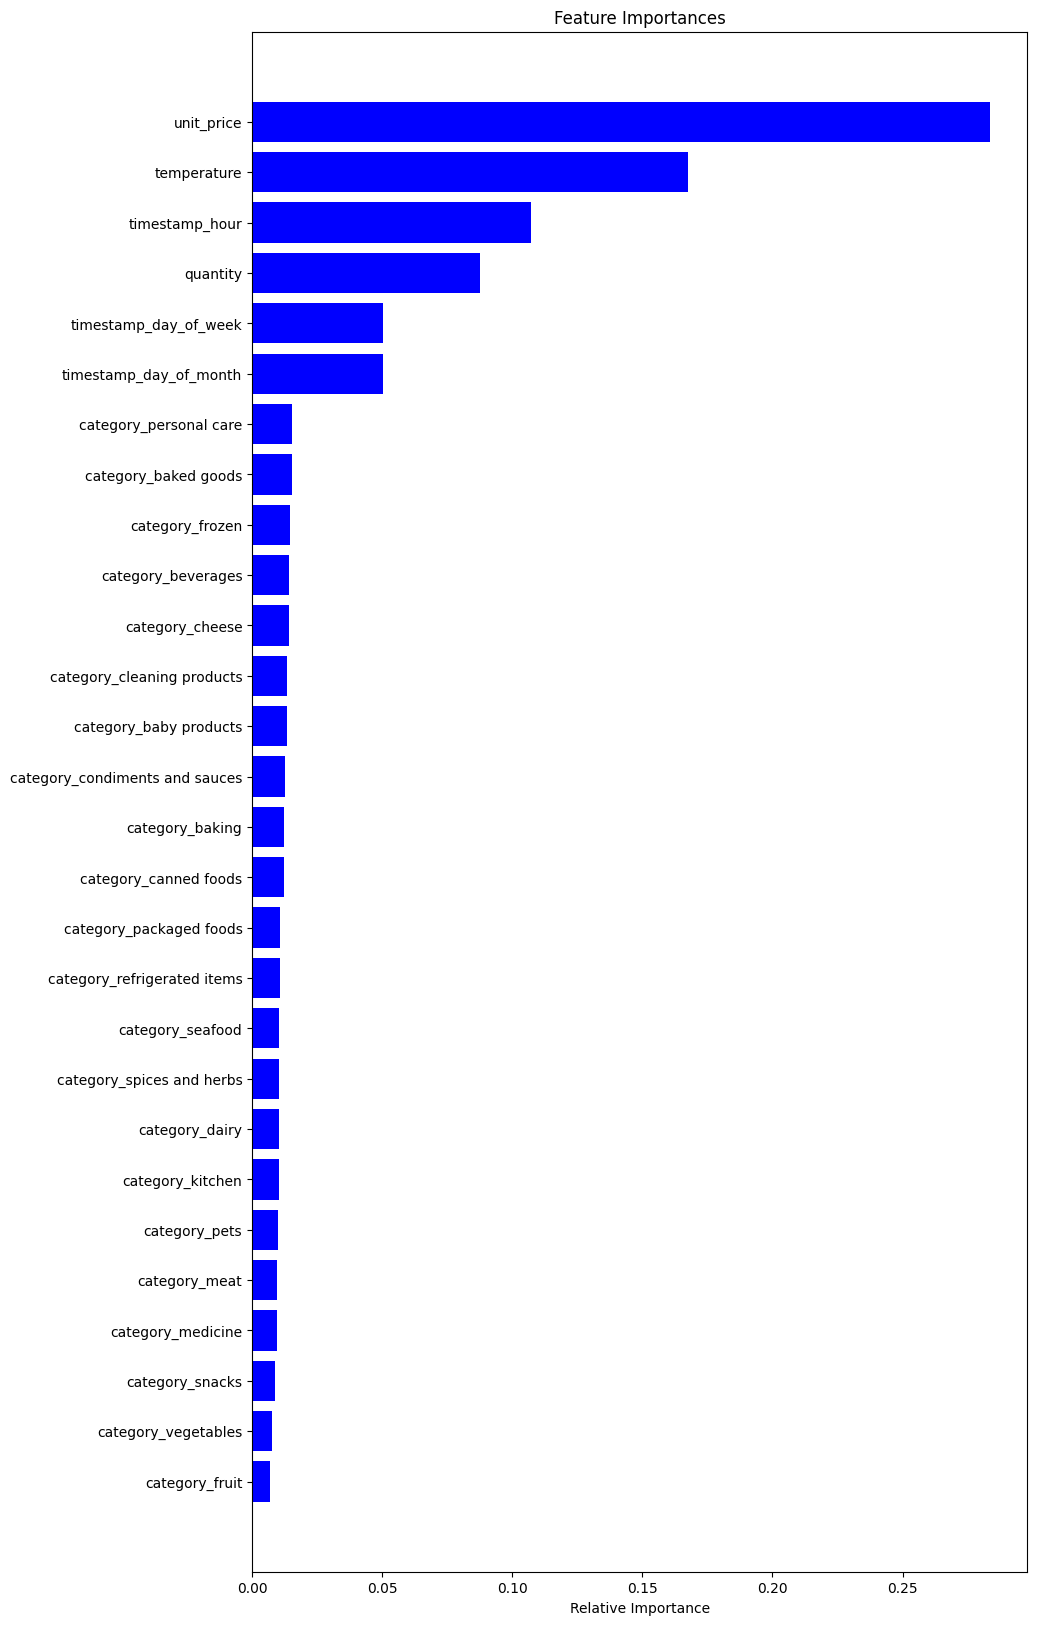

In [22]:
#checking the feature in the dataset
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png')
plt.show()